## Assignment 2

### Srinikethan Pusthay (SXP210162)

In [20]:
# importing and loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#### Loading the data

In [3]:
data = pd.read_csv(r'C:\Users\psrin\OneDrive - The University of Texas at Dallas\Desktop\Srini UTD\BUAN 6341\Assignment\SeoulBikeData.csv',encoding = 'unicode_escape',index_col=0)

In [4]:
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Date,,,,,,,,,,,,,
01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
data.columns = ['rented_bike_count', 'hour','temperature_in_c','humidity_percentage','wind_speed_mps','visibility_10m','dew_point_temperature_in_c','solar_radiation','rainfall_mm','snowfall_cm','seasons','holiday','functioning_day']

In [5]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


#### Transforming variables

In [9]:
data.loc[data["rented_bike_count"] < 704.602, "rented_bike_count"] = 0
data.loc[data["rented_bike_count"] >= 704.602, "rented_bike_count"] = 1
data.loc[data["seasons"] == "Spring", "seasons"] = 1
data.loc[data["seasons"] == "Summer", "seasons"] = 2
data.loc[data["seasons"] == "Autumn", "seasons"] = 3
data.loc[data["seasons"] == "Winter", "seasons"] = 4
data.loc[data["functioning_day"] == "Yes", "functioning_day"] = 1
data.loc[data["functioning_day"] == "No", "functioning_day"] = 0
data.loc[data["holiday"] == "Holiday", "holiday"] = 1
data.loc[data["holiday"] == "No Holiday", "holiday"] = 0

In [10]:
data['rented_bike_count'].value_counts()

0    5238
1    3522
Name: rented_bike_count, dtype: int64

In [11]:
data = data.reset_index(drop=True)
data.columns = [0,1,2,3,4,5,6,7,8,9,10,11,12]
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,0,1
1,0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,0,1
2,0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,0,1
3,0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,4,0,1
4,0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,0,1


In [12]:
x = data[[1,2,3,4,5,6,7,8,9,10,11,12]].values
y = data[[0]].values

#### Splitting data into Train and Test

In [13]:
x_train, x_test = x[:6132,:], x[6132:,:]
print(x_train.shape, x_test.shape)

(6132, 12) (2628, 12)


In [14]:
y_train, y_test = y[:6132,:], y[6132:,:]
print(y_train.shape, y_test.shape)

(6132, 1) (2628, 1)


In [15]:
u = np.unique(y, return_inverse = True)
u

(array([0, 1], dtype=int64), array([0, 0, 0, ..., 0, 1, 0], dtype=int64))

#### Scaling the training data

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### SVM with RBF Kernel and varying C

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
for C_value in [1,10,100,1000]:
    svc_C_value = SVC(C=C_value)
    svc_C_value.fit(x_train,np.ravel(y_train))
    y_pred=svc_C_value.predict(x_test)
    print('Model accuracy score with rbf kernel and C={0} : {1:0.4f}'. format(C_value,accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C:1 : 0.7896
Model accuracy score with rbf kernel and C:10 : 0.7953
Model accuracy score with rbf kernel and C:100 : 0.7355
Model accuracy score with rbf kernel and C:1000 : 0.6575


### SVM with Linear Kernel and varying C

In [20]:
for C_value in [1,10,100,1000]:
    svc_C_value = SVC(kernel='linear', C=C_value)
    svc_C_value.fit(x_train,np.ravel(y_train))
    y_pred=svc_C_value.predict(x_test)
    
    print('Model accuracy score with linear kernel and C={0} : {1:0.4f}'. format(C_value,accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C:1 : 0.7028
Model accuracy score with linear kernel and C:10 : 0.7032
Model accuracy score with linear kernel and C:100 : 0.7036
Model accuracy score with linear kernel and C:1000 : 0.7040


### SVM with polynomial kernel and varying C

In [21]:
for C_value in [1,10,100,1000]:
    svc_C_value = SVC(kernel='poly', C=C_value)
    svc_C_value.fit(x_train,np.ravel(y_train))
    y_pred=svc_C_value.predict(x_test)
    print('Model accuracy score with polynomial kernel and C={0} : {1:0.4f}'. format(C_value,accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C:1 : 0.6290
Model accuracy score with polynomial kernel and C:10 : 0.6712
Model accuracy score with polynomial kernel and C:100 : 0.7245
Model accuracy score with polynomial kernel and C:1000 : 0.7519


### SVM with sigmoid kernel and varying C

In [24]:
for C_value in [1,10,100,1000]:
    svc_C_value = SVC(kernel='sigmoid', C=C_value)
    svc_C_value.fit(x_train,np.ravel(y_train))
    y_pred=svc_C_value.predict(x_test)
    print('Model accuracy score with sigmoid kernel and C={0} : {1:0.4f}'. format(C_value,accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C:1 : 0.6408
Model accuracy score with sigmoid kernel and C:10 : 0.6199
Model accuracy score with sigmoid kernel and C:100 : 0.6176
Model accuracy score with sigmoid kernel and C:1000 : 0.6164


### Best accurate model, RBF Kernel and C=10

In [63]:
svc10=SVC(C=10) 
svc10.fit(x_train,np.ravel(y_train))
y_pred_test=svc10.predict(x_test)
print('Model accuracy score with rbf kernel and C=10.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with rbf kernel and C=10.0 : 0.7953


#### Comparing Train set and Testing set accuracy

In [64]:
y_pred_train = svc10.predict(x_train)
y_pred_train
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9268


In [65]:
print('Training set score: {:.4f}'.format(svc10.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(svc10.score(x_test, y_test)))

Training set score: 0.9268
Test set score: 0.7953


#### Confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1086  131]
 [ 407 1004]]

True Positives(TP) =  1086

True Negatives(TN) =  1004

False Positives(FP) =  131

False Negatives(FN) =  407


In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80      1217
           1       0.88      0.71      0.79      1411

    accuracy                           0.80      2628
   macro avg       0.81      0.80      0.80      2628
weighted avg       0.81      0.80      0.79      2628



In [20]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7953


In [21]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification error : 0.2047
Precision : 0.8924
Recall or Sensitivity : 0.7274
True Positive Rate : 0.7274
False Positive Rate : 0.1154
Specificity : 0.8846


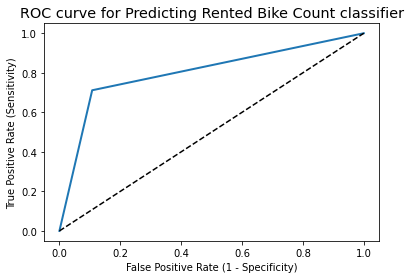

In [66]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting Rented Bike Count classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [23]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8020


In [24]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(svc10, x_train, np.ravel(y_train), cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9157


### K-Fold Cross Validation for various Kernels

In [75]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5, shuffle=True, random_state=0)

linear_svc=SVC(kernel='linear')
linear_scores = cross_val_score(linear_svc, x, np.ravel(y), cv=kfold)
print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))
print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Stratified cross-validation scores with linear kernel:

[0.84474886 0.85787671 0.8390411  0.84360731 0.84417808]
Average stratified cross-validation score with linear kernel:0.8459


In [47]:
rbf_svc=SVC(kernel='poly')
rbf_scores = cross_val_score(rbf_svc, x, np.ravel(y), cv=kfold)
print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))
print('Average stratified cross-validation score with polynomial kernel:{:.4f}'.format(rbf_scores.mean()))

Stratified Cross-validation scores with rbf kernel:

[0.73630137 0.73515982 0.72545662 0.73573059 0.72716895]
Average stratified cross-validation score with rbf kernel:0.7320


In [48]:
rbf_svc=SVC(kernel='rbf')
rbf_scores = cross_val_score(rbf_svc, x, np.ravel(y), cv=kfold)
print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))
print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Stratified Cross-validation scores with rbf kernel:

[0.74315068 0.73287671 0.7163242  0.71004566 0.7140411 ]
Average stratified cross-validation score with rbf kernel:0.7233


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc=SVC() 
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]

grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_search.fit(x_train, np.ravel(y_train))

print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.7888


Parameters that give the best results : 

 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=10, gamma=0.1)


In [53]:
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(x_test, y_test)))

GridSearch CV score on test set: 0.7877


In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


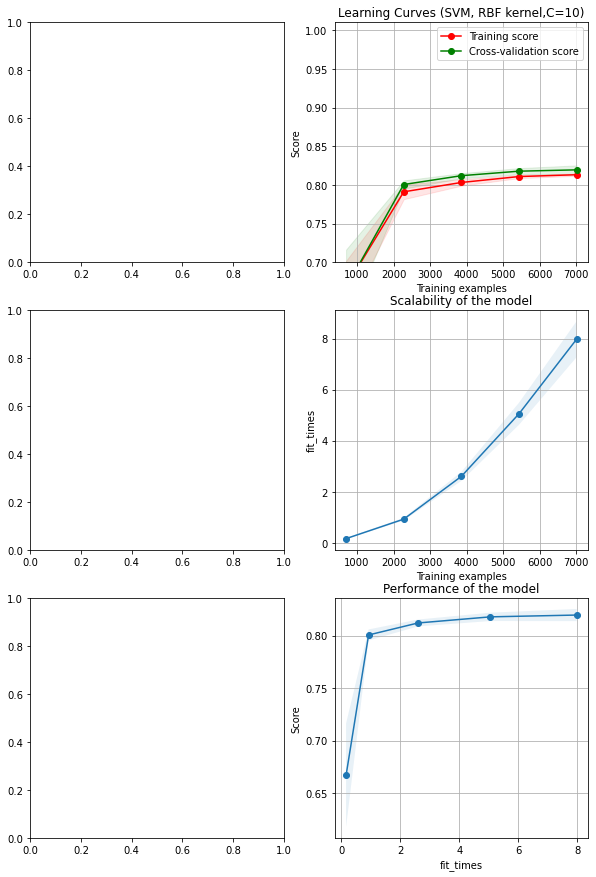

In [24]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = r"Learning Curves (SVM, RBF kernel,C=10)"

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(C=10)
plot_learning_curve(
    estimator, title, x, y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

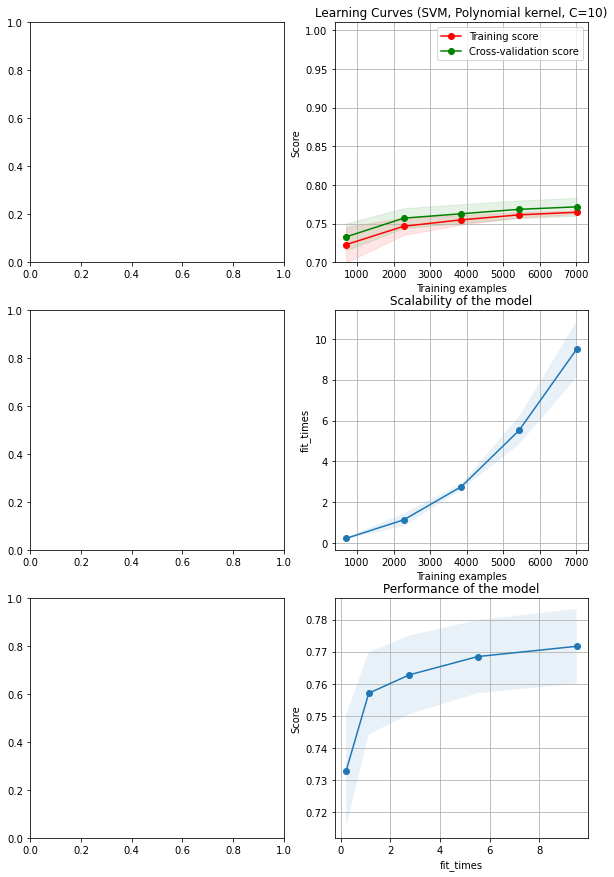

In [26]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
title = r"Learning Curves (SVM, Polynomial kernel, C=10)"

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(kernel='poly',C=10)
plot_learning_curve(
    estimator, title, x, y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)
plt.show()

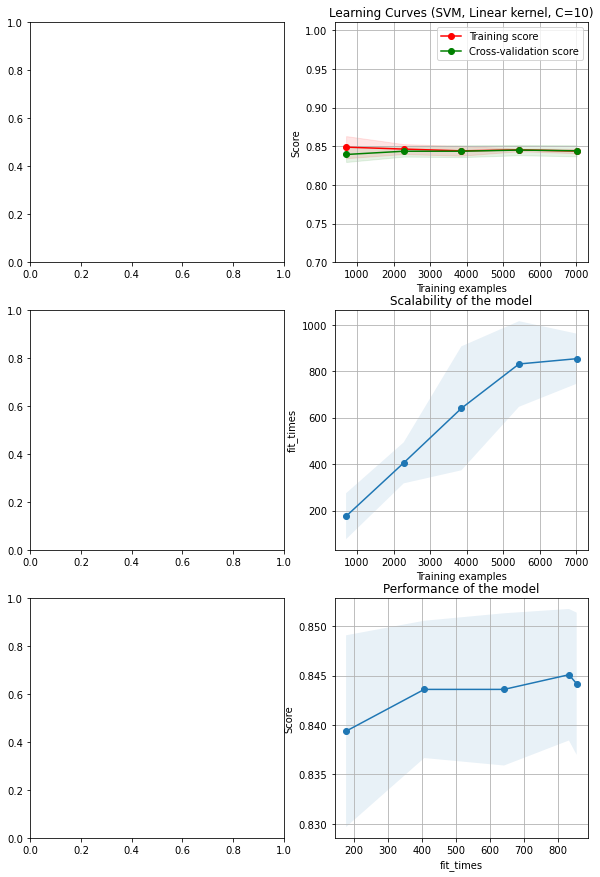

In [27]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
title = r"Learning Curves (SVM, Linear kernel, C=10)"

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(kernel='linear',C=10)
plot_learning_curve(
    estimator, title, x, y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)
plt.show()

### Decision Tree

In [41]:
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score
tree = tree.DecisionTreeClassifier()
tree = tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)

precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with Decision Tree: {0:.2f}%".format(precision))

probs = tree.predict_proba(x_test)
probs = probs[:, 1]
tree_fpr, tree_tpr, thresholds = metrics.roc_curve(y_test, probs)
tree_auc = metrics.roc_auc_score(y_test, probs)

Accuracy with Decision Tree: 78.35%


In [34]:
pred_kfold = cross_val_score(tree, x, y, cv=5) 
print("Accuracy with DECISION TREE and K-FOLD CROSS VALIDATION: %0.2f (+/- %0.2f)" % (pred_kfold.mean(), pred_kfold.std() * 2))

Accuracy with DECISION TREE and K-FOLD CROSS VALIDATION: 0.69 (+/- 0.26)


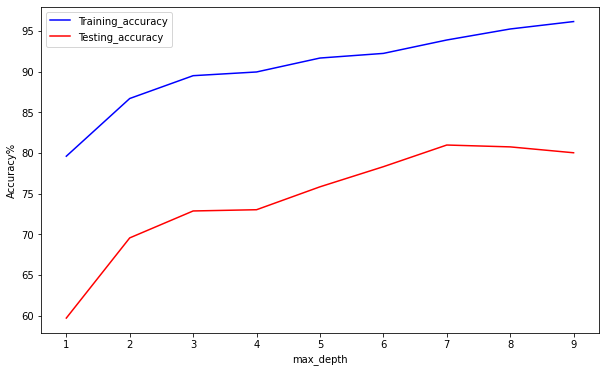

In [35]:
from sklearn import tree
score_train=[]
score_test=[]

for i in range(1,10):
    dtree_md = tree.DecisionTreeClassifier(max_depth=i)
    dtree_md.fit(x_train,y_train)
    
    score_train.append(dtree_md.score(x_train,y_train)*100)
    score_test.append(dtree_md.score(x_test,y_test)*100)
    
score_train_array=np.asarray(score_train)
score_test_array=np.asarray(score_test)
plt.figure(figsize=(10,6))
plt.plot(range(1,10),score_train_array,color='blue', label="Training_accuracy")
plt.plot(range(1,10),score_test_array,color='red',label="Testing_accuracy")

plt.legend()
plt.xlabel('max_depth')
plt.ylabel('Accuracy%')
plt.show()

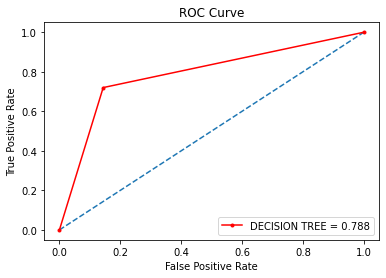

In [36]:
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(tree_fpr, tree_tpr, 'r', marker='.',label = 'DECISION TREE = %.3f' % tree_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

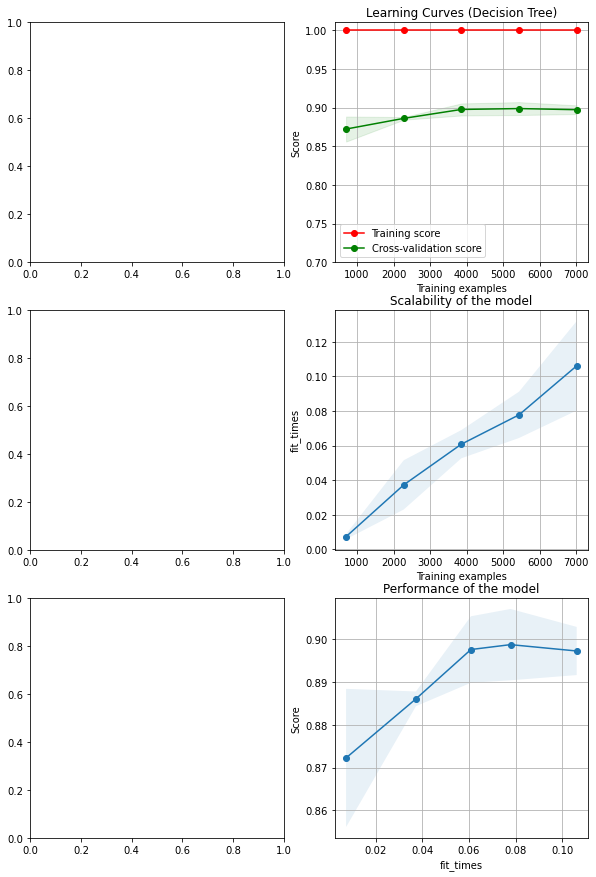

In [45]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
title = r"Learning Curves (Decision Tree)"

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = tree.DecisionTreeClassifier()
plot_learning_curve(
    estimator, title, x, y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)
plt.show()

In [46]:
clf = tree.DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 1.04836455e-04 1.08337816e-04 1.29655193e-04
 1.35899109e-04 1.35899109e-04 1.39781940e-04 1.39781940e-04
 1.42694064e-04 1.42694064e-04 1.46771037e-04 1.48253573e-04
 1.48253573e-04 1.49489019e-04 1.50534397e-04 1.50534397e-04
 1.50534397e-04 1.51832107e-04 1.52207002e-04 1.52207002e-04
 1.53486052e-04 1.54607297e-04 1.55926346e-04 1.55988542e-04
 1.56806664e-04 1.57455519e-04 1.57455519e-04 1.57642966e-04
 1.57761139e-04 1.58137144e-04 1.59196099e-04 1.59533736e-04
 1.59881304e-04 1.61072129e-04 1.61204460e-04 1.61211614e-04
 1.63078930e-04 1.63078930e-04 1.63078930e-04 1.63078930e-04
 1.63078930e-04 1.63905902e-04 1.64079973e-04 1.65568312e-04
 1.81198811e-04 1.83986485e-04 1.86285094e-04 1.88406768e-04
 1.94215160e-04 1.95694716e-04 2.06566645e-04 2.09233344e-04
 2.09672910e-04 2.12408835e-04 2.13675486e-04 2.17438574e-04
 2.17438574e-04 2.17438574e-04 2.17438574e-04 2.17438574e-04
 2.17438574e-04 2.17438574e-04 2.17438574e-04 2.17438574e-04
 2.17438574e-04 2.174385

In [47]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

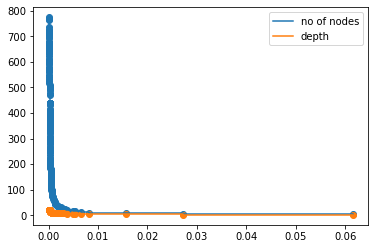

In [48]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

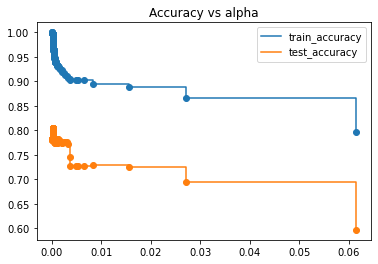

In [49]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(x_train)
    y_test_pred = c.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix
classes = ['1','0']
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 0.9717873450750163
Test score 0.8047945205479452
Train Confusion matrix


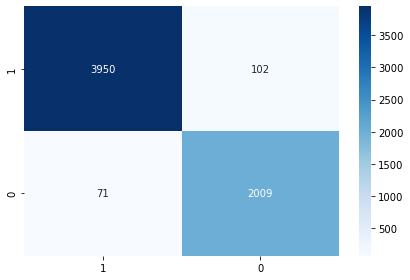

Test Confusion matrix


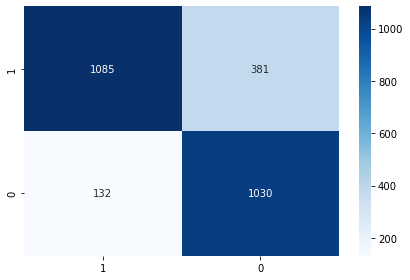

In [61]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.0003)
clf_.fit(x_train,y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

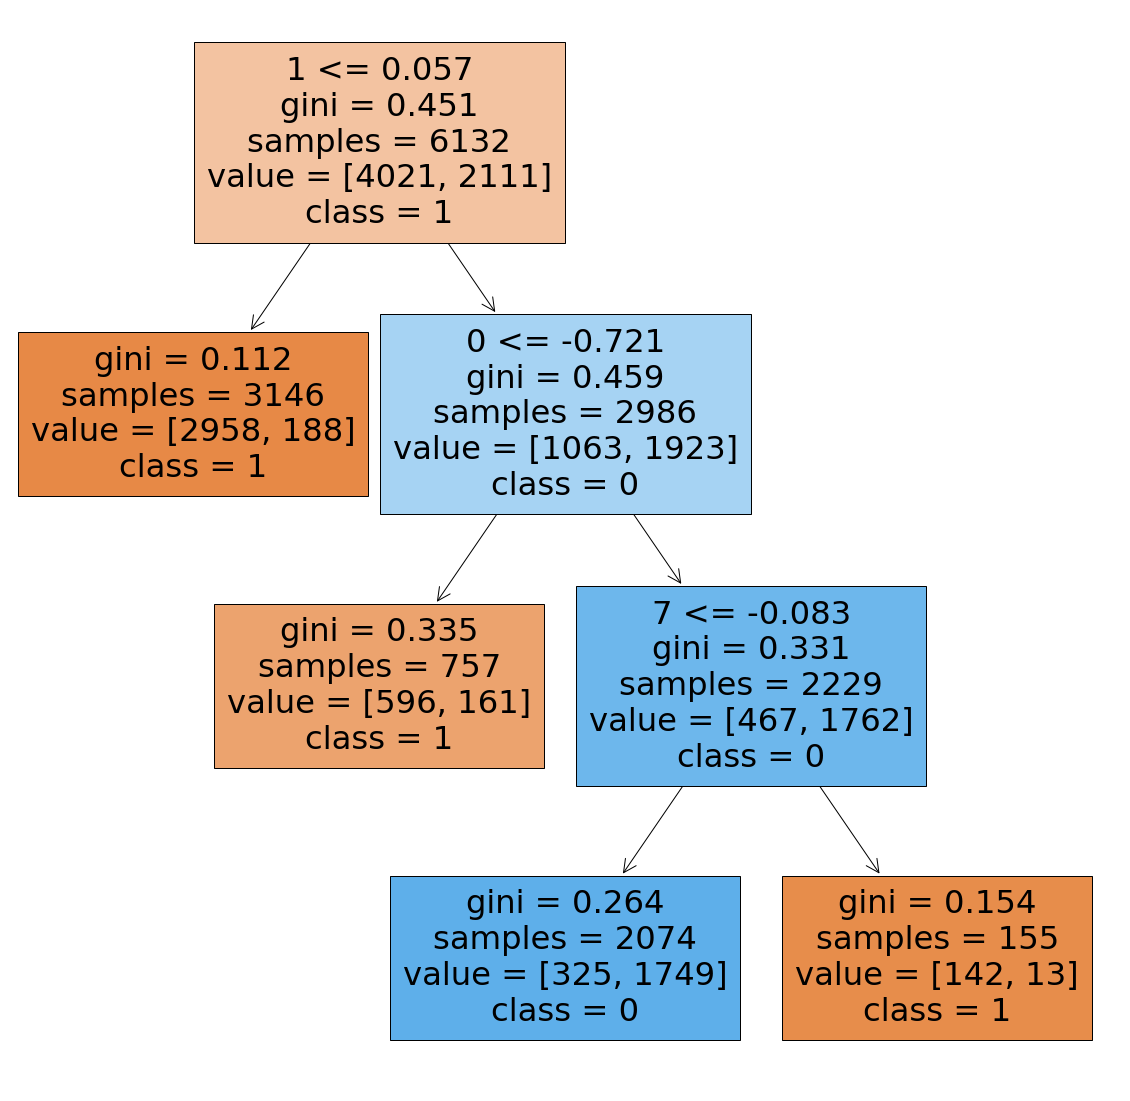

In [52]:
plt.figure(figsize=(20,20))
features = data.columns
classes = ['1','0']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()